#  Building Model for Predicting Loan status 

## Introduction

Prosper was founded in 2005 as the first peer-to-peer lending marketplace in the United States. Since then, Prosper has facilitated more than USD 12 billion in loans to more than 770,000 people.
Through Prosper, people can invest in each other in a way that is financially and socially rewarding. Borrowers apply online for a fixed-rate, fixed-term loan between USD 2,000 and USD 40,000. Individuals and institutions can invest in the loans and earn attractive returns. Prosper handles all loan servicing on behalf of the matched borrowers and investors. (source: https://www.prosper.com/about)

We have taken loan data from 2005 to 2014.Dataset contains loan information from prosper, having 113937 rows of loan listings with 81 columns. It has features columns like 'LoanStatus',ClosedDate','BorrowerAPR',
'BorrowerRate','Occupation', 'CreditScoreRangeLower',EmploymentStatus','DebtToIncomeRatio',IncomeRange',
'TotalProsperLoans','MonthlyLoanPayment'.

Prosper had problem with increased default rate till 2009, then it came up with prosper rating score(SEC guidelines)to decide on eligibility and interest rate. Since then default rate reduced much. Now we have data available from 2009 -14 with prosper rating to train our machine learning models to make predictions.

This project aims to build model to predict loan status with given features as input. Since our target data is qualitative and has multiple categories, We can use multi class classification models like Decision tree, SVM and KNN classifiers.



#### Data Dictionary:

https://docs.google.com/spreadsheets/d/1k60B40cr0YAR51X8dmqLGyYBqKzN80Vm2Pnxx3GtHcw/edit?usp=sharing




### Importing Modules

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data preparation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Models from Sklearn
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 

# Model evaluation 
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_log_error
from mlxtend.plotting import plot_confusion_matrix


### Loading Data

In [2]:
# Setting row & column display limits
pd.set_option('display.max_columns',85)
pd.set_option('display.max_rows',50)

In [3]:
# Loading dataset
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [4]:
# Checking null values
df.isnull().sum().to_frame()

,0
ListingKey,0
ListingNumber,0
ListingCreationDate,0
CreditGrade,84984
Term,0
...,...
PercentFunded,0
Recommendations,0
InvestmentFromFriendsCount,0
InvestmentFromFriendsAmount,0


In [5]:
df.shape

(113937, 81)

In [6]:
# Checking for last date in dataset
df.ListingCreationDate.max()

'2014-03-10 12:20:53.760000000'

In [7]:
# Getting data after SEC guidelines implementation
df_latest = df[df['ListingCreationDate']> '2009-08-01']
df_latest.reset_index()

,index,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.0000,0.00,0.0000,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
1,3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.2000,4091.09,1052.1100,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
2,4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN,Executive,Employed,44.0,True,False,NaN,2013-09-14 18:38:44,680.0,699.0,2004-02-20 00:00:00,19.0,19.0,49.0,6,220.0,1.0,9.0,0.0,0.0,0.0,0.0,0.0,6193.0,0.81,695.0,39.0,0.95,2.0,0.26,"$100,000+",True,9583.333333,A180369302188889200689E,1.0,11.0,11.0,0.0,0.0,11000.0,9947.90,NaN,0,NaN,6,102670,15000,2013-09-20 00:00:00,Q3 2013,36CE356043264555721F06C,563.97,2819.8500,1563.22,1256.6300,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
3,5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,0.11567,0.0449,0.07077,5.0,B,10.0,1,NM,Professional,Employed,82.0,True,False,NaN,2013-12-14 08:26:40,740.0,759.0,1973-03-01 00:00:00,21.0,17.0,49.0,13,1410.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,62999.0,0.39,86509.0,47.0,1.00,0.0,0.36,"$100,000+",True,8333.333333,C3D63702273952547E79520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,3,123257,15000,2013-12-24 00:00:00,Q4 2013,874A3701157341738DE458F,342.37,679.3400,351.89,327.4500,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
4,6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,0.23820,0.1275,0.11070,2.0,E,2.0,

### Data Cleaning

In [8]:
# Checking for duplicates
df_latest.duplicated().sum()

0

In [9]:
# Getting columns with null values
null_val = df_latest.isnull().sum()
null_val[null_val>0]

CreditGrade                            84672
ClosedDate                             58848
Occupation                              1333
EmploymentStatusDuration                  19
GroupKey                               82681
DebtToIncomeRatio                       7281
TotalProsperLoans                      64990
TotalProsperPaymentsBilled             64990
OnTimeProsperPayments                  64990
ProsperPaymentsLessThanOneMonthLate    64990
ProsperPaymentsOneMonthPlusLate        64990
ProsperPrincipalBorrowed               64990
ProsperPrincipalOutstanding            64990
ScorexChangeAtTimeOfListing            68145
LoanFirstDefaultedCycleNumber          78446
dtype: int64

In [10]:
df_latest.shape

(84672, 81)

In [11]:
# Removing columns not required for model building (Which were not obtained during listing and additional cols)
cols  = ['CreditGrade','ClosedDate','BorrowerAPR','LenderYield','EstimatedEffectiveYield','EstimatedLoss',
         'EstimatedReturn','ProsperRating (Alpha)','LoanCurrentDaysDelinquent','LoanFirstDefaultedCycleNumber',
         'LoanMonthsSinceOrigination','MemberKey','LP_CustomerPayments','LP_CustomerPrincipalPayments',
         'LP_InterestandFees','LP_ServiceFees','LP_CollectionFees','LP_GrossPrincipalLoss','LP_NetPrincipalLoss',
         'LP_NonPrincipalRecoverypayments']
df_latest.drop(columns=cols,axis=1,inplace=True)

/tmp/ipykernel_388411/1623999155.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_latest.drop(columns=cols,axis=1,inplace=True)


In [12]:
# Treating Null values
df_latest['Occupation'].fillna('Other',inplace=True)
df_latest['EmploymentStatusDuration'].fillna(0,inplace=True)
df_latest['DebtToIncomeRatio'].fillna(0,inplace=True)

/tmp/ipykernel_388411/904412548.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_latest['Occupation'].fillna('Other',inplace=True)
/tmp/ipykernel_388411/904412548.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_latest['EmploymentStatusDuration'].fillna(0,inplace=True)
/tmp/ipykernel_388411/904412548.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_latest['DebtToIncomeRatio'].fillna(0,inplace=True)


In [13]:
df_latest.fillna(0,inplace=True)

/tmp/ipykernel_388411/584199176.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_latest.fillna(0,inplace=True)


In [14]:
# Checking null values
null_val = df_latest.isnull().sum()
null_val[null_val>0]

Series([], dtype: int64)

In [15]:
# Changing datatype
df_latest['LoanOriginationDate'] = pd.to_datetime(df_latest['LoanOriginationDate'])
df_latest['ListingCreationDate'] = pd.to_datetime(df_latest['ListingCreationDate'])

/tmp/ipykernel_388411/3528415050.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_latest['LoanOriginationDate'] = pd.to_datetime(df_latest['LoanOriginationDate'])
/tmp/ipykernel_388411/3528415050.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_latest['ListingCreationDate'] = pd.to_datetime(df_latest['ListingCreationDate'])


In [16]:
df_new = df_latest.copy()

In [17]:
# Adding new column Year, Month
df_new['Year'] = df_new['LoanOriginationDate'].apply(lambda x: x.year)
df_new['Month'] = df_new['LoanOriginationDate'].apply(lambda x: x.month)
# Checking values
df_new['Month'].value_counts()

1     9313
12    8869
10    8828
11    8077
2     7844
9     6798
8     6481
7     6279
3     6030
6     5938
5     5360
4     4855
Name: Month, dtype: int64

In [18]:
# Checking target values
df_new['LoanStatus'].value_counts()

Current                   56576
Completed                 19501
Chargedoff                 5326
Defaulted                   997
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Name: LoanStatus, dtype: int64

In [19]:
# Function for labeling new column
def rowlabel(row):
    if row['LoanStatus'] == 'Current':
        return 'No'
    if row['LoanStatus'] == 'Completed':
        return 'No'
    return 'Yes'

# Creating new target column
df_new['IsDefaulted'] = df_new.apply(rowlabel,axis=1)
    


In [20]:
df_new.drop('LoanStatus',axis=1,inplace=True)

### Data Preparation

In [21]:
# Identifying Categorical and Numerical features
category = []
integer = []
for label, content in df_new.items():
    if pd.api.types.is_string_dtype(content):
        category.append(label)
    else:
        integer.append(label)
        
category

['ListingKey',
 'BorrowerState',
 'Occupation',
 'EmploymentStatus',
 'GroupKey',
 'DateCreditPulled',
 'FirstRecordedCreditLine',
 'IncomeRange',
 'LoanKey',
 'LoanOriginationQuarter',
 'IsDefaulted']

In [22]:
# Making copy to prepare for modeling
data = df_new.copy()
data.reset_index()
data.sample(1)

,ListingKey,ListingNumber,ListingCreationDate,Term,BorrowerRate,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,Year,Month,IsDefaulted
25478,58A03547784836642B85E9B,594482,2012-05-30 16:19:11.150,36,0.1902,4.0,4.0,1,MD,Attorney,Employed,122.0,True,False,0,2012-05-30 16:19:08,720.0,739.0,1992-08-28 00:00:00,19.0,17.0,69.0,12,543.0,7.0,13.0,0.0,0.0,2.0,0.0,0.0,17127.0,0.43,10470.0,52.0,0.75,2.0,0.17,"$100,000+",True,27916.666667,326636522624143148CA3D7,1.0,6.0,6.0,0.0,0.0,5000.0,4408.37,-15.0,67457,10000,2012-06-06,Q2 2012,366.66,1.0,0,0,0.0,15,2012,6,No


In [23]:
# Converting features to categorical
for label, content in data.items():
    if pd.api.types.is_string_dtype(content):
        data[label] = content.astype('category').cat.as_ordered()

In [24]:
# Categorical features to codes
for label,content in data.items():
    if not pd.api.types.is_numeric_dtype(content):
        data[label] = pd.Categorical(content).codes+1

In [25]:
data.sample(1)

,ListingKey,ListingNumber,ListingCreationDate,Term,BorrowerRate,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,Year,Month,IsDefaulted
35336,987,704936,39488,36,0.0974,6.0,7.0,1,14,20,1,122.0,True,False,1,39448,840.0,859.0,5508,13.0,13.0,32.0,10,332.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,19707.0,0.19,73633.0,30.0,1.0,3.0,0.2,3,True,8333.333333,49541,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85046,16000,877,4,514.32,1.0,0,0,0.0,320,2013,2,1


### Building Model

In [26]:
# Dividing Features and Target as Train and Test set
X_train,X_test,y_train,y_test = train_test_split(data.drop('IsDefaulted',axis=1),data['IsDefaulted'],
                                                 test_size=0.1,random_state=42)

#### Decision tree classifier

In [27]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
dtc.score(X_test,y_test)

0.8354983467170525

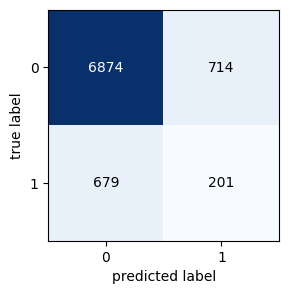

In [29]:
dty_pred = dtc.predict(X_test)
plot_confusion_matrix(confusion_matrix(y_test,dty_pred),figsize=(5,3));                      

In [30]:
np.sqrt(mean_squared_log_error(y_test,dty_pred))

0.1644

In [31]:
print(classification_report(y_test,dty_pred))

              precision    recall  f1-score   support

           1       0.91      0.91      0.91      7588
           2       0.22      0.23      0.22       880

    accuracy                           0.84      8468
   macro avg       0.56      0.57      0.57      8468
weighted avg       0.84      0.84      0.84      8468



#### KNN Classifier

In [32]:
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)

KNeighborsClassifier()

In [33]:
knc.score(X_test,y_test)

0.8791922531884743

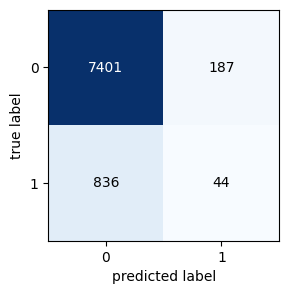

In [34]:
kny_pred = knc.predict(X_test)
plot_confusion_matrix(confusion_matrix(y_test,kny_pred),figsize=(5,3));

In [35]:
np.sqrt(mean_squared_log_error(y_test,dty_pred))

0.1644

In [36]:
print(classification_report(y_test,dty_pred))

              precision    recall  f1-score   support

           1       0.91      0.91      0.91      7588
           2       0.22      0.23      0.22       880

    accuracy                           0.84      8468
   macro avg       0.56      0.57      0.57      8468
weighted avg       0.84      0.84      0.84      8468



#### Naive Bayes Classifier

In [37]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [38]:
gnb.score(X_test,y_test)

0.6876476145488899

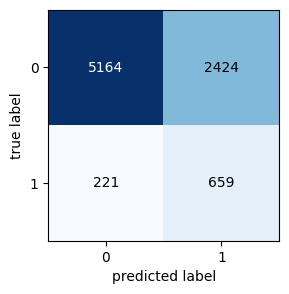

In [39]:
gny_pred = gnb.predict(X_test)
plot_confusion_matrix(confusion_matrix(y_test,gny_pred),figsize=(5,3));

In [40]:
np.sqrt(mean_squared_log_error(y_test,dty_pred))

0.1644

In [41]:
print(classification_report(y_test,gny_pred))

              precision    recall  f1-score   support

           1       0.96      0.68      0.80      7588
           2       0.21      0.75      0.33       880

    accuracy                           0.69      8468
   macro avg       0.59      0.71      0.56      8468
weighted avg       0.88      0.69      0.75      8468



###  When looking at accuracy score, Knn classifier appears good with 87.9%, but it identified only 5% of default cases. Whereas naive bayes has correctly identified 75% of defaulters, but wrongly labeled 35% non-defaulters as defaulters. 

### Here, our main motto is to identify defaulters, so we can conclude naive bayes is ideal solution.